# Oplevering uitwerking van de casus
- uiterlijk woensdag 8 januari 2020 om 24:00.
- inleveropdracht ELO Studieroute ‘MCL.19 Machine Learning’.
- Per team één ZIP-file met:
- één Jupyter notebook, dat op andere computer uitgevoerd kan worden (let op path van files)
- 1ste cell: naam casus + korte beschrijving doel casus + referentie (bron)dataset
- 2de cell: teamleden.
- 3de cell: versies van de gebruikte libraries, conform colleges.
- één folder ‘datasets' met de gebruikte datasets en
- ZIP filenaam bevat teamnummer.
- Presentatie: vrijdag 10 januari 2020, in lokaal AB4.26 (De Nieuwe Bibliotheek)
Succes Stefan, Peter
(MCL Team 2019-2020)

Naam casus
Korte beschrijving
referentie

Team: 6
1. Florian Maters,
2. Kento Bergsma,
3. David van der Zande,
4. Ahasan Rajaratnam

versies van de gebruikte libraries

# Description
YYYYMMDD = Datum (YYYY=jaar MM=maand DD=dag)
### Temperatuur
TG = Etmaalgemiddelde temperatuur (in 0.1 graden Celsius)<br> 
TN = Minimum temperatuur (in 0.1 graden Celsius)<br>
TNH = Uurvak waarin TN is gemeten<br>
TX = Maximum temperatuur (in 0.1 graden Celsius)<br>
TXH = Uurvak waarin TX is gemeten<br>
### Neerslag
DR = Duur van de neerslag (in 0.1 uur)<br>
RH = Etmaalsom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm)<br>
RHX = Hoogste uursom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm)<br> 
RHXH = Uurvak waarin RHX is gemeten

In [7]:
# http://projects.knmi.nl/klimatologie/daggegevens/selectie.cgi


import pandas as pd
import numpy as np

# Machine Learning
from sklearn import preprocessing, svm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Visualization
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline
matplotlib.style.use('ggplot')
from matplotlib.pyplot import figure


import seaborn as sns
# pd.set_option('display.max_rows', df.shape[0]+1)

df = pd.read_csv('data/maastricht.csv', low_memory=False)
df1 = pd.read_csv('data/location.csv')
df['STN'] = df['STN'].map(df1.set_index('STN')['NAME'])

df = df[['STN', 'YYYYMMDD', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'DR', 'RH', 'RHX', 'RHXH', ]]
df['Datum'] = df['YYYYMMDD'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df['Jaar'] = pd.DatetimeIndex(df['Datum']).year
df['Maand'] = pd.DatetimeIndex(df['Datum']).month
df['Dag'] = pd.DatetimeIndex(df['Datum']).day
# Zet waarde van meten in 0.1 graden Celsius naar meten in 1 graden Celsius
df['TN'] *= 0.1
df['TX'] *= 0.1
df['TG'] *= 0.1

# Zet waarde van meten in 0.1 uur naar meten in 1 uur
df['DR'] *= 0.1

print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41638 entries, 0 to 41637
Data columns (total 15 columns):
STN         41638 non-null object
YYYYMMDD    41638 non-null int64
TG          41638 non-null float64
TN          41638 non-null float64
TNH         25202 non-null float64
TX          41638 non-null float64
TXH         25202 non-null float64
DR          23010 non-null float64
RH          23010 non-null float64
RHX         23010 non-null float64
RHXH        9580 non-null float64
Datum       41638 non-null datetime64[ns]
Jaar        41638 non-null int64
Maand       41638 non-null int64
Dag         41638 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(4), object(1)
memory usage: 4.8+ MB
None


,STN,YYYYMMDD,TG,TN,TNH,TX,TXH,DR,RH,RHX,RHXH,Datum,Jaar,Maand,Dag
0,MAASTRICHT,19060101,-2.3,-5.9,NaN,2.6,NaN,NaN,NaN,NaN,NaN,1906-01-01,1906,1,1
1,MAASTRICHT,19060102,-2.1,-5.5,NaN,0.6,NaN,NaN,NaN,NaN,NaN,1906-01-02,1906,1,2
2,MAASTRICHT,19060103,2.1,-4.4,NaN,5.5,NaN,NaN,NaN,NaN,NaN,1906-01-03,1906,1,3
3,MAASTRICHT,19060104,7.7,5.5,NaN,9.7,NaN,NaN,NaN,NaN,NaN,1906-01-04,1906,1,4
4,MAASTRICHT,19060105,8.3,7.1,NaN,9.7,NaN,NaN,NaN,NaN,NaN,1906-01-05,1906,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41633,MAASTRICHT,20191227,5.5,4.7,24.0,6.8,2.0,1.6,5.0,2.0,1.0,2019-12-27,2019,12,27
41634,MAASTRICHT,20191228,1.9,-1.2,23.0,5.2,14.0,0.0,0.0,0.0,1.0,2019-12-28,2019,12,28
41635,MAASTRICHT,20191229,1.1,-2.8,7.0,6.3,21.0,0.0,0.0,0.0,1.0,2019-12-29,2019,12,29
41636,MAASTRICHT,20191230,5.0,0.0,7.0,10.5,14.0,0.0,0.0,0.0,1.0,2019-12-30,2019,12,30


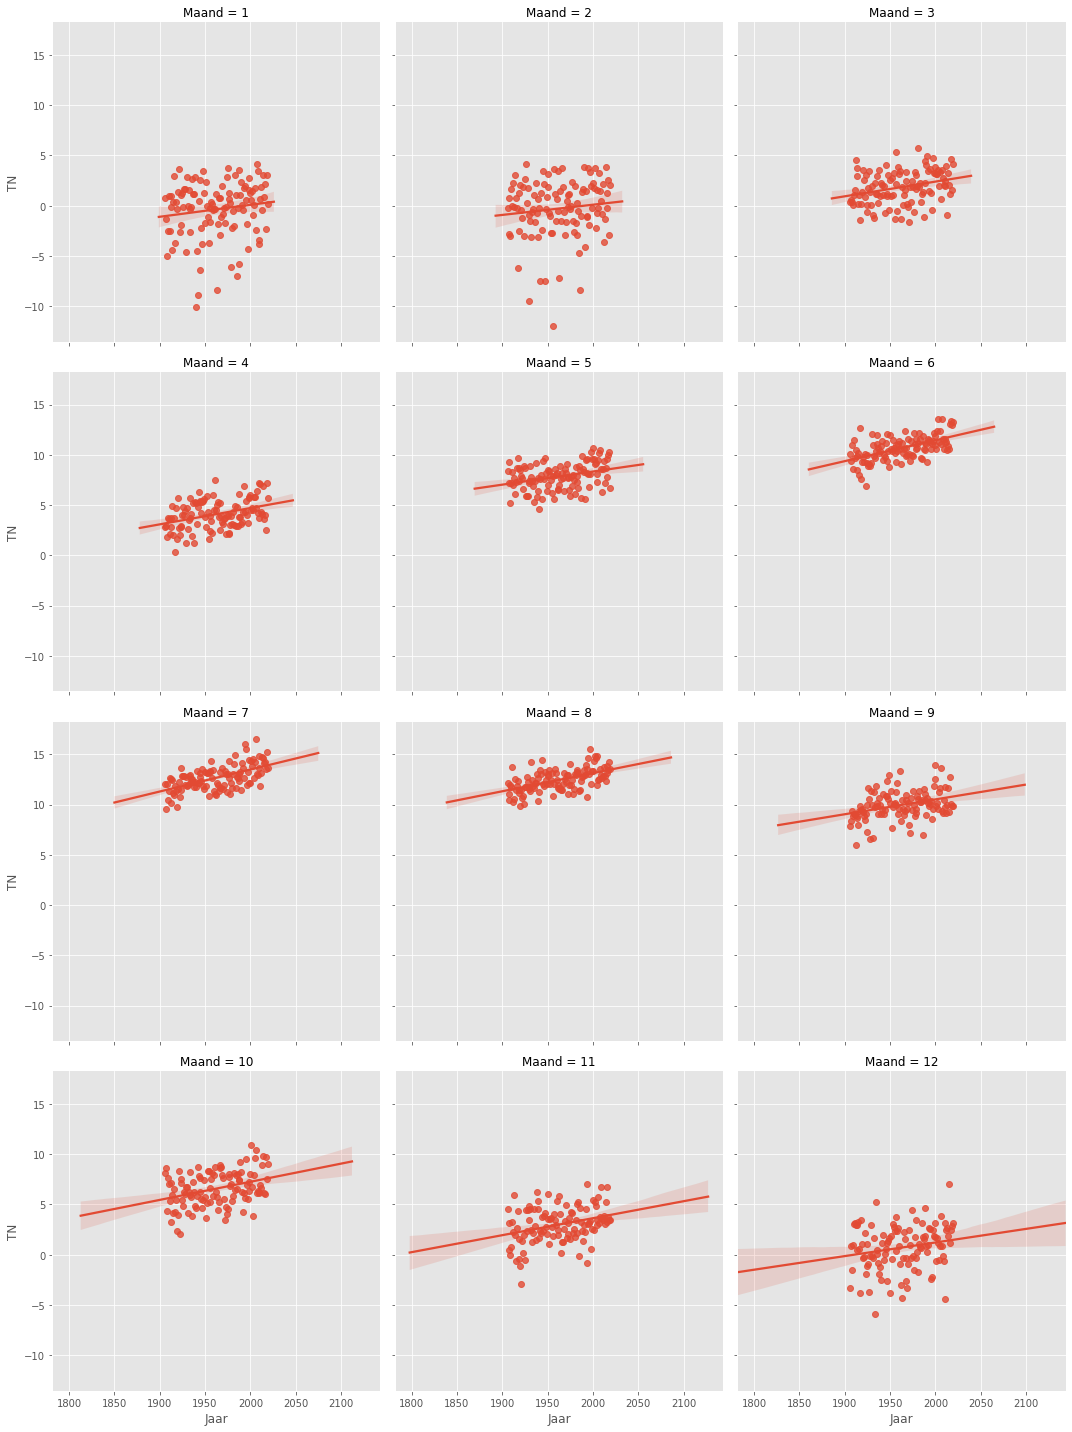

In [2]:
dfTemp = df[['YYYYMMDD', 'Datum', 'TN', 'TX', 'TG', 'Jaar', 'Maand', 'Dag']]
dfTempMin = dfTemp[['Datum', 'TN', 'Jaar', 'Maand', 'Dag']]
dfTempMinMean = dfTempMin.groupby(['Jaar', 'Maand'],as_index=False)['TN'].mean()
sns.lmplot(x='Jaar', y='TN', data=dfTempMinMean, col="Maand", col_wrap=3)

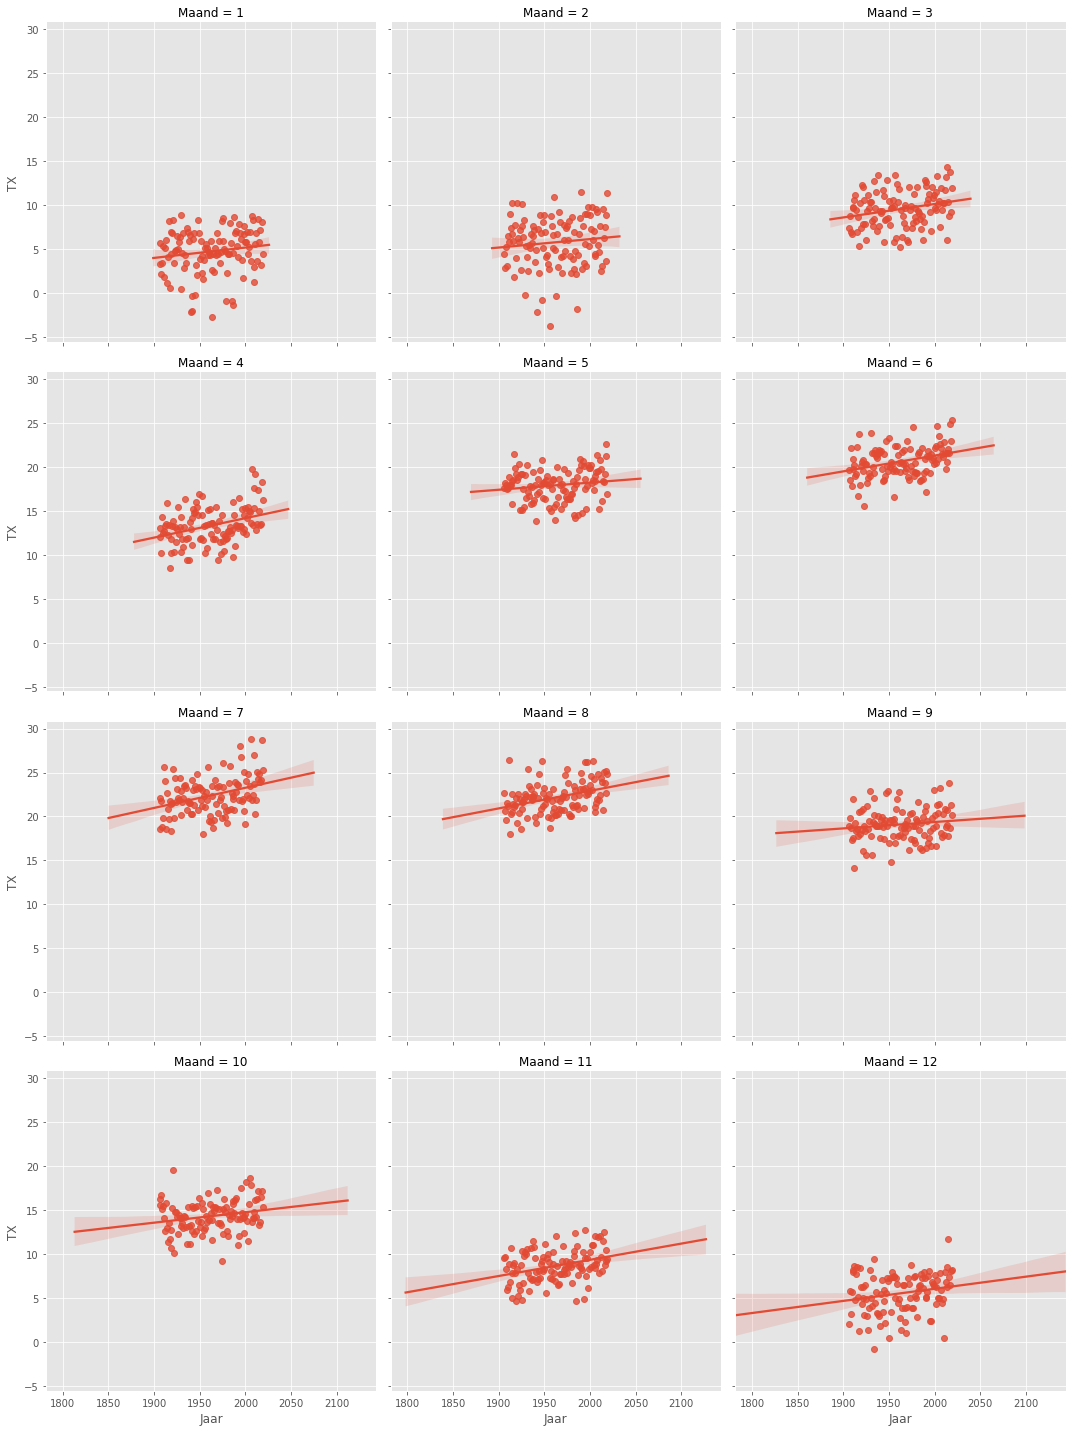

In [3]:
dfTempMax = dfTemp[['Datum', 'TX', 'Jaar', 'Maand', 'Dag']]
dfTempMaxMean = dfTempMax.groupby(['Jaar', 'Maand'],as_index=False)['TX'].mean()
sns.lmplot(x='Jaar', y='TX', data=dfTempMaxMean, col="Maand", col_wrap=3)

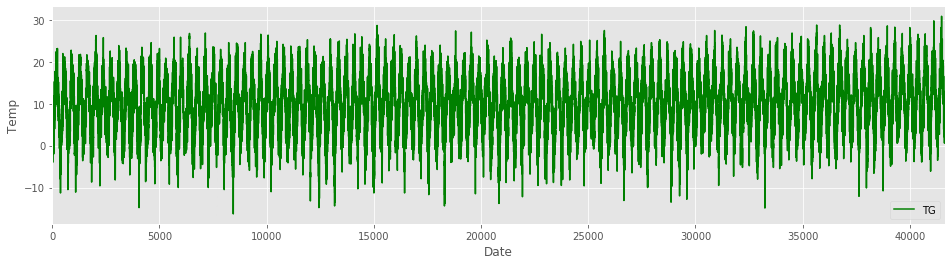

In [4]:
dfTempGem = dfTemp[['Datum', 'TG', 'Jaar', 'Maand', 'Dag']]

dfTempGemMean = dfTempGem.groupby(['Jaar', 'Maand'],as_index=False)['TG'].mean()

dfTest = dfTemp[['Datum', 'TG']]

dfTest['TG'].plot(figsize=(16,4), color="green")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Temp')
plt.show()

# dfTempGemMean = dfTempGem.groupby(['Jaar', 'Maand'],as_index=False)['TG'].mean()
# sns.lmplot(x='Jaar', y='TG', data=dfTempGemMean, col="Maand", col_wrap=3)

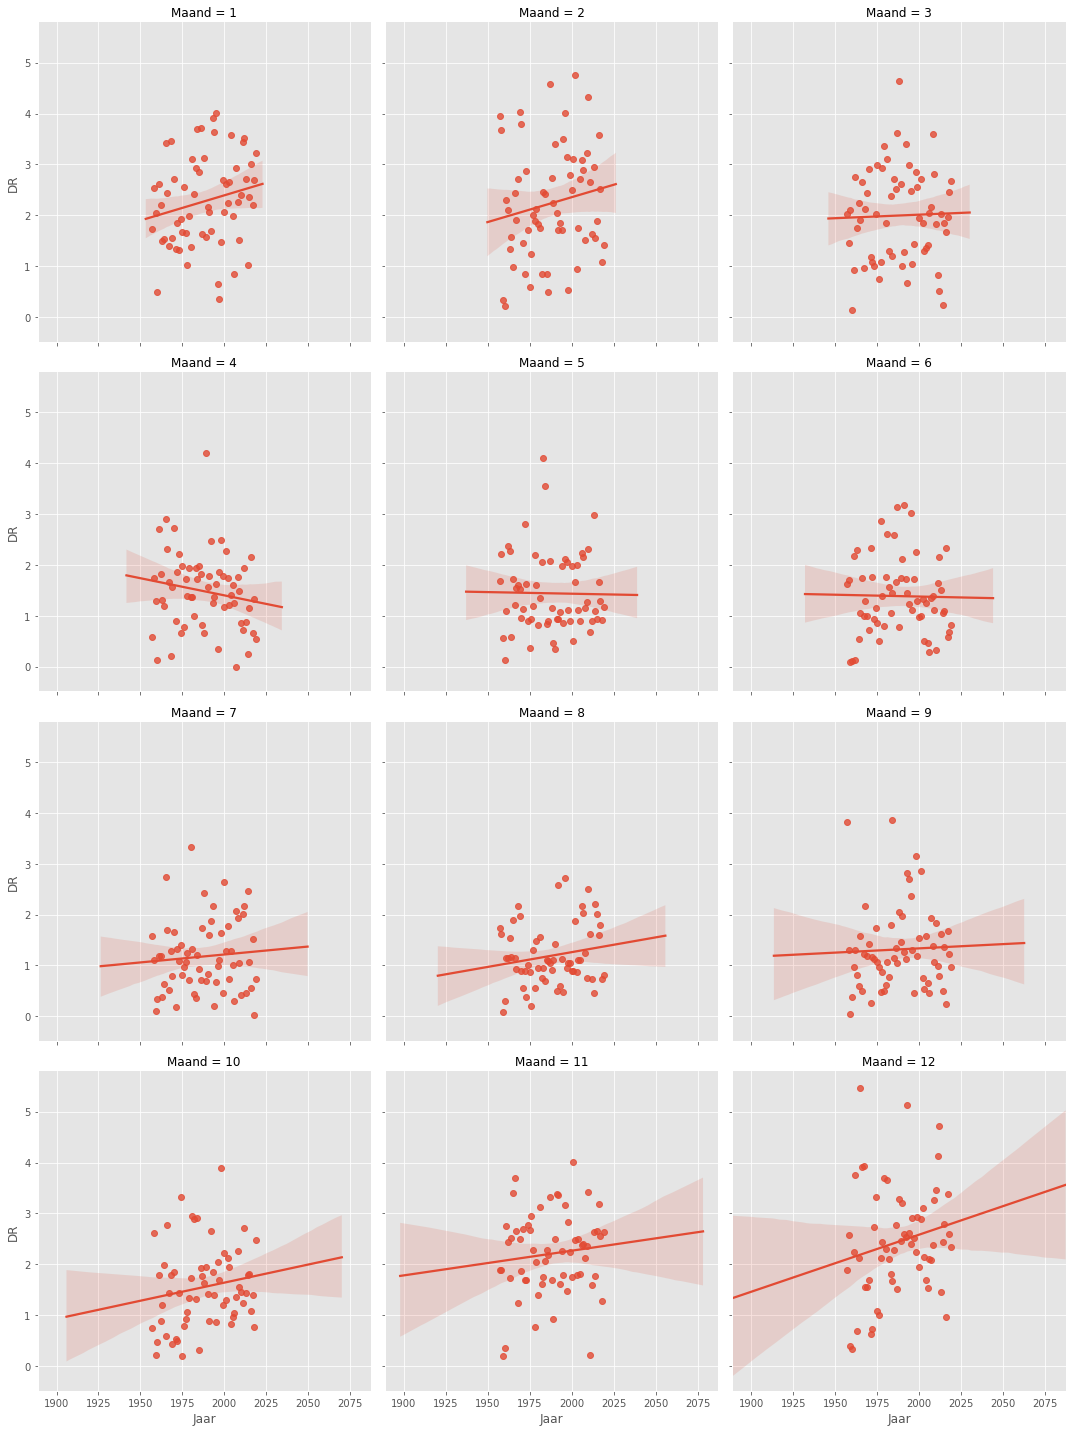

In [5]:
dfRegen = df[['YYYYMMDD', 'Datum', 'DR', 'Jaar', 'Maand', 'Dag']]
dfRegenMean = dfRegen.groupby(['Jaar', 'Maand'],as_index=False)['DR'].mean()
dfRegenMean = dfRegenMean.dropna()
sns.lmplot(x='Jaar', y='DR', data=dfRegenMean, col='Maand', col_wrap=3)

Coefficients: 
 [0.01957124]
Mean squared error: 35.25
Coefficient of determination: 0.00


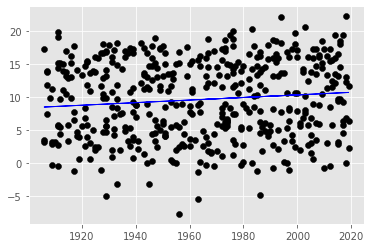

In [6]:
# insert our own data
data_X = dfTempGemMean['Jaar'].to_numpy()
data_X = np.reshape(data_X, (-1, 1))
data_Y = dfTempGemMean['TG'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    data_X, data_Y, test_size=0.33, random_state=2)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=1)

plt.show()